In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
def generate_crime_data(n_samples=1000, random_state=42):
    np.random.seed(random_state)
    # Define cluster centers (simulating hotspots) around typical San Francisco coordinates
    centers = np.array([[37.78, -122.42], [37.76, -122.45], [37.80, -122.41]])
    n_clusters = centers.shape[0]
    samples_per_cluster = n_samples // n_clusters
    latitudes = []
    longitudes = []

    # Generate clustered data points for each hotspot
    for center in centers:
        lat = np.random.normal(loc=center[0], scale=0.01, size=samples_per_cluster)
        lon = np.random.normal(loc=center[1], scale=0.01, size=samples_per_cluster)
        latitudes.extend(lat)
        longitudes.extend(lon)

    # If there are leftover samples, generate them uniformly over a broader region
    leftover = n_samples - samples_per_cluster * n_clusters
    if leftover > 0:
        latitudes.extend(np.random.uniform(low=37.75, high=37.81, size=leftover))
        longitudes.extend(np.random.uniform(low=-122.48, high=-122.38, size=leftover))

    # Create a DataFrame similar in structure to the SF police data
    data = pd.DataFrame({
        'IncidentID': range(n_samples),
        'Category': np.random.choice(['LARCENY/THEFT', 'ASSAULT', 'ROBBERY', 'VANDALISM'], size=n_samples),
        'PdDistrict': np.random.choice(['NORTHERN', 'SOUTHERN', 'BAYVIEW', 'RICHMOND', 'TENDERLOIN'], size=n_samples),
        'Latitude': latitudes,
        'Longitude': longitudes,
        'Date': pd.to_datetime(np.random.choice(pd.date_range('2020-01-01', '2020-12-31'), size=n_samples)),
        'Time': np.random.choice(pd.date_range('00:00', '23:59', freq='1min').time, size=n_samples)
    })

    return data

In [3]:
crime_data = generate_crime_data(n_samples=1000)

In [4]:
coords = crime_data[['Latitude', 'Longitude']].values
kde = KernelDensity(bandwidth=0.005, kernel='gaussian')
kde.fit(coords)

KernelDensity(bandwidth=0.005)

In [5]:
lat_lin = np.linspace(37.75, 37.81, 100)
lon_lin = np.linspace(-122.48, -122.38, 100)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)
grid_coords = np.vstack([lat_grid.ravel(), lon_grid.ravel()]).T

In [6]:
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(lat_grid.shape)

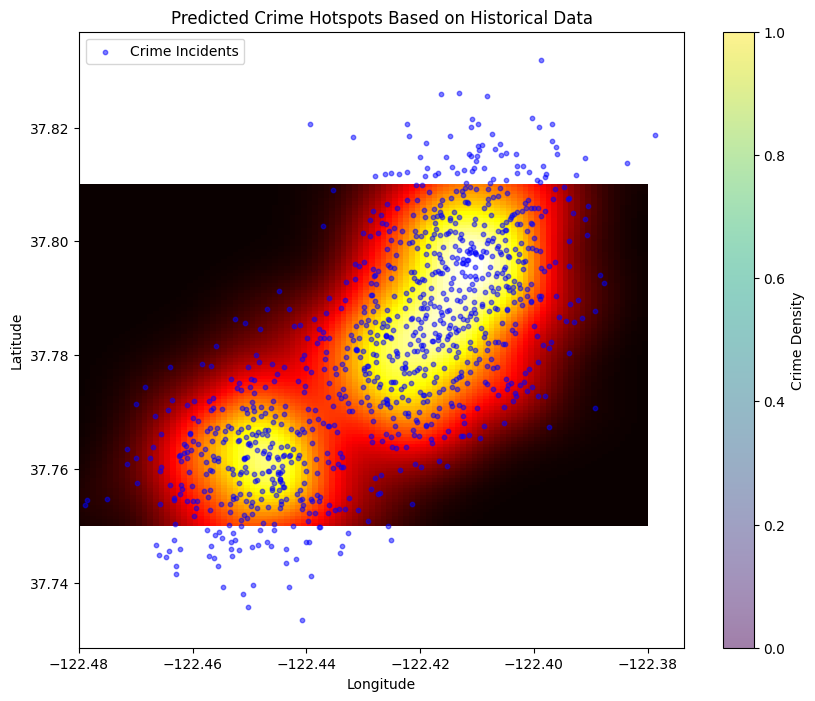

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(density, origin='lower', cmap='hot',
           extent=[-122.48, -122.38, 37.75, 37.81])
plt.scatter(crime_data['Longitude'], crime_data['Latitude'], s=10, c='blue', alpha=0.5, label='Crime Incidents')
plt.colorbar(label='Crime Density')
plt.title('Predicted Crime Hotspots Based on Historical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()